훈련, 검증, 테스트 폴더로 이미지 복사하기

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [2]:
import os, shutil

original_dataset_dir = './datasets/cats_and_dogs/train'

base_dir = './datasets/cats_and_dogs_small'
if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
    shutil.rmtree(base_dir)   # 이 코드는 책에 포함되어 있지 않습니다.
os.mkdir(base_dir)


train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = [f'cat.{i}.jpg' for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = [f'cat.{i}.jpg' for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = [f'cat.{i}.jpg' for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = [f'dog.{i}.jpg' for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = [f'dog.{i}.jpg' for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = [f'dog.{i}.jpg' for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [3]:
print('훈련용 고양이 이미지 전체 개수 :', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수 :', len(os.listdir(train_dogs_dir)))
print('검증용 고양이 이미지 전체 개수 :', len(os.listdir(validation_cats_dir)))
print('검증용 강아지 이미지 전체 개수 :', len(os.listdir(validation_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수 :', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수 :', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수 : 1000
훈련용 강아지 이미지 전체 개수 : 1000
검증용 고양이 이미지 전체 개수 : 500
검증용 강아지 이미지 전체 개수 : 500
테스트용 고양이 이미지 전체 개수 : 500
테스트용 강아지 이미지 전체 개수 : 500


강아지 vs 고양이 분류를 위한 소규모 컨브넷 만들기

In [4]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), padding='same',activation='relu', input_shape=(150,150,3))) #패딩처리
#model.add(layers.Conv2D(32, (3,3),strides=1, padding='valid', activation='relu', input_shape=(150,150,3))) #기본값
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 73, 73, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

모델의 훈련 설정하기

In [6]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer = optimizers.RMSprop(lr=1e-4),
             metrics = ['acc'])

ImageDataGenerator를 사용하여 디렉터리에서 이미지 읽기

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


배치 제너레이터를 사용하여 모델 훈련시키기

In [9]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/30
100/100 [==============================] - 37s 369ms/step - loss: 0.6848 - acc: 0.5480 - val_loss: 0.5935 - val_acc: 0.5220
Epoch 2/30
100/100 [==============================] - 34s 337ms/step - loss: 0.6429 - acc: 0.6220 - val_loss: 0.6967 - val_acc: 0.6380
Epoch 3/30
100/100 [==============================] - 34s 338ms/step - loss: 0.5938 - acc: 0.6830 - val_loss: 0.5819 - val_acc: 0.6680
Epoch 4/30
100/100 [==============================] - 34s 338ms/step - loss: 0.5599 - acc: 0.7050 - val_loss: 0.6700 - val_acc: 0.6880
Epoch 5/30
100/100 [==============================] - 34s 337ms/step - loss: 0.5283 - acc: 0.7305 - val_loss: 0.4933 - val_acc: 0.6890
Epoch 6/30
100/100 [==============================] - 34s 339ms/step - loss: 0.4990 - acc: 0.7530 - val_loss: 0.6290 - val_acc: 0.6950
Epoch 7/30
100/100 [==============================] - 34s 339ms/step - loss: 0.4804 - acc: 0.7650 - val_loss: 0.6594 - val_acc: 0.6930
Epoch 8/30
100/100 [==============================] - 3

모델 저장하기

In [10]:
model.save('cats_and_dogs_small_1.h5')

훈련의 정확도와 손실 그래프 그리기

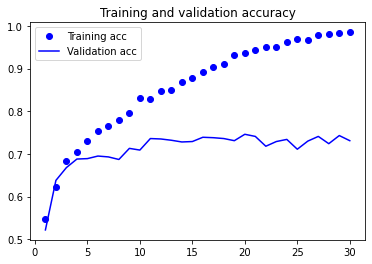

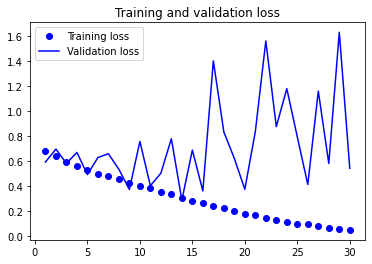

In [13]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

imageDataGenerator를 사용하여 데이터 증식 설정하기

In [14]:
datagen = ImageDataGenerator(rotation_range=20,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=True,
                            fill_mode='nearest')

랜덤하게 증식된 훈련 이미지 그리기

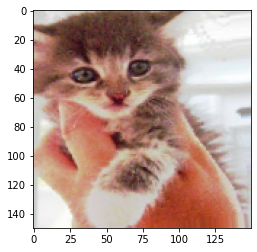

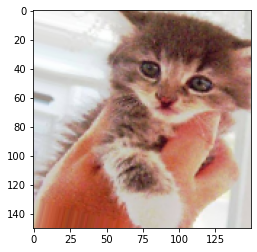

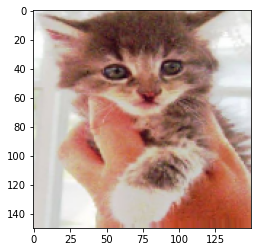

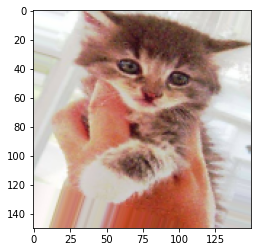

In [15]:
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)
x = x.reshape((1,)+x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i +=1
    if i % 4 == 0:
        break
plt.show()

드롭아웃을 포함한 새로운 컨브넷 정의하기

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

데이터 증식 제너레이터를 사용하여 컨브넷 훈련하기

In [17]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 51s 508ms/step - loss: 0.6914 - acc: 0.5226 - val_loss: 0.6758 - val_acc: 0.5057
Epoch 2/100
100/100 [==============================] - 46s 457ms/step - loss: 0.6751 - acc: 0.5751 - val_loss: 0.6495 - val_acc: 0.6050
Epoch 3/100
100/100 [==============================] - 46s 458ms/step - loss: 0.6496 - acc: 0.6058 - val_loss: 0.6476 - val_acc: 0.6326
Epoch 4/100
100/100 [==============================] - 46s 457ms/step - loss: 0.6315 - acc: 0.6420 - val_loss: 0.6359 - val_acc: 0.5619
Epoch 5/100
100/100 [==============================] - 46s 458ms/step - loss: 0.6197 - acc: 0.6471 - val_loss: 0.6016 - val_acc: 0.6555
Epoch 6/100
100/100 [==============================] - 46s 460ms/step - loss: 0.6072 - acc: 0.6718 - val_loss: 0.5004 - val_acc: 0.7055
Epoch 7/100
100/100 [==============================] - 46s 460ms/step - loss: 0.5979 - acc: 0.6736 -

모델 저장하기

In [18]:
model.save('cats_and_dogs_small_2.h5')

데이터 증식을 사용했을 때 훈련정확도와 검증 정확도

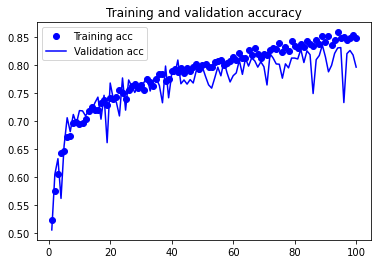

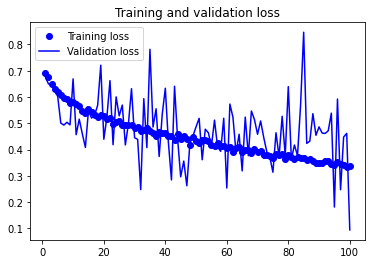

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()